In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.11.1'

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('forest_fire/Training and Validation',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1832 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('forest_fire/Testing',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 68 images belonging to 2 classes.


In [5]:
cnn = tf.keras.models.Sequential()

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [12]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
58/58 [==============================] - 6s 88ms/step - loss: 0.2545 - accuracy: 0.8985 - val_loss: 0.3156 - val_accuracy: 0.9118
Epoch 2/25
58/58 [==============================] - 4s 68ms/step - loss: 0.1509 - accuracy: 0.9460 - val_loss: 0.2509 - val_accuracy: 0.9265
Epoch 3/25
58/58 [==============================] - 5s 77ms/step - loss: 0.1448 - accuracy: 0.9503 - val_loss: 0.2996 - val_accuracy: 0.9118
Epoch 4/25
58/58 [==============================] - 4s 76ms/step - loss: 0.1537 - accuracy: 0.9454 - val_loss: 0.2145 - val_accuracy: 0.9265
Epoch 5/25
58/58 [==============================] - 4s 75ms/step - loss: 0.1186 - accuracy: 0.9563 - val_loss: 0.2050 - val_accuracy: 0.9265
Epoch 6/25
58/58 [==============================] - 5s 86ms/step - loss: 0.1124 - accuracy: 0.9580 - val_loss: 0.2066 - val_accuracy: 0.9265
Epoch 7/25
58/58 [==============================] - 5s 87ms/step - loss: 0.1113 - accuracy: 0.9629 - val_loss: 0.2164 - val_accuracy: 0.9412
Epoch 8/25
58

In [16]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('C:/Users/Bhavani K/Desktop/M GANESHV12/M PES/M SEM 4/M hashcode/forest_fire/Training and Validation/fire/abc001.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'no_fire'
else:
  prediction = 'fire'

1/1 [==============================] - 0s 16ms/step


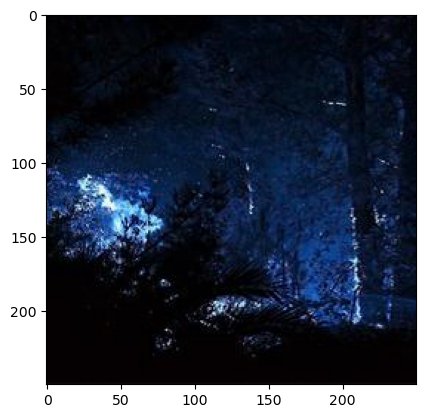

In [18]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
im = cv2.imread('C:/Users/Bhavani K/Desktop/M GANESHV12/M PES/M SEM 4/M hashcode/forest_fire/Training and Validation/fire/abc001.jpg',cv2.IMREAD_UNCHANGED)  #cv2.IMREAD_COLOR  or 1
plt.imshow(im)
plt.show()

In [19]:
print(prediction)

fire


In [20]:
cnn.save('cnn_1.h5')

In [74]:
!pip install opencv-python